In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits

In [4]:
digits = load_digits()

In [8]:
df = pd.DataFrame(digits.data,digits.target)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0


In [9]:
df['target'] = digits.target
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('target',axis = 'columns'),df.target,test_size=0.2)

In [11]:
from sklearn.svm import SVC
rbf_model = SVC(kernel='rbf')
rbf_model.fit(X_train,y_train)

SVC()

In [12]:
rbf_model.score(X_test,y_test)

0.9777777777777777

In [15]:
kernels = ('linear','poly','rbf')
import sklearn.svm as svm
for index,kernel in enumerate(kernels):
    model = svm.SVC(kernel=kernel)
    model.fit(X_train,y_train)
    score = model.score(X_test,y_test)
    print("{} score with {} kernel used".format(score,kernel))

0.9833333333333333 score with linear kernel used
0.9777777777777777 score with poly kernel used
0.9777777777777777 score with rbf kernel used


we will use the linear kernel here with the highest score

In [16]:
linearsvm = SVC(kernel='linear')

In [17]:
linearsvm.fit(X_train,y_train)

SVC(kernel='linear')

In [22]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred = linearsvm.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9833333333333333


<Axes: >

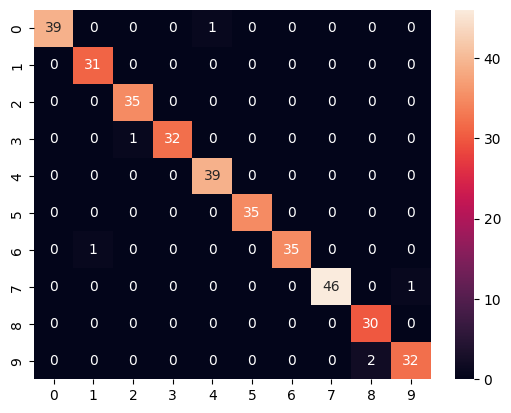

In [25]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [26]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.97      1.00      0.98        31
           2       0.97      1.00      0.99        35
           3       1.00      0.97      0.98        33
           4       0.97      1.00      0.99        39
           5       1.00      1.00      1.00        35
           6       1.00      0.97      0.99        36
           7       1.00      0.98      0.99        47
           8       0.94      1.00      0.97        30
           9       0.97      0.94      0.96        34

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [31]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal,uniform

param_distributions = {"gamma": reciprocal(0.001,0.1),"C":uniform(1,10)}
rnd_search_cv = RandomizedSearchCV(linearsvm,param_distributions,n_iter=10,verbose=2,cv=3)
rnd_search_cv.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....C=3.019779011558558, gamma=0.013039640720788018; total time=   0.0s
[CV] END ....C=3.019779011558558, gamma=0.013039640720788018; total time=   0.0s
[CV] END ....C=3.019779011558558, gamma=0.013039640720788018; total time=   0.0s
[CV] END .....C=7.100251362880441, gamma=0.03264854069462976; total time=   0.0s
[CV] END .....C=7.100251362880441, gamma=0.03264854069462976; total time=   0.0s
[CV] END .....C=7.100251362880441, gamma=0.03264854069462976; total time=   0.0s
[CV] END ...C=5.539666743748224, gamma=0.0013547909198770667; total time=   0.0s
[CV] END ...C=5.539666743748224, gamma=0.0013547909198770667; total time=   0.0s
[CV] END ...C=5.539666743748224, gamma=0.0013547909198770667; total time=   0.0s
[CV] END ....C=7.853548002020271, gamma=0.020867095605088558; total time=   0.0s
[CV] END ....C=7.853548002020271, gamma=0.020867095605088558; total time=   0.0s
[CV] END ....C=7.853548002020271, gamma=0.020867

RandomizedSearchCV(cv=3, estimator=SVC(kernel='linear'),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001403411BCE0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000014035B4FCE0>},
                   verbose=2)

In [32]:
rnd_search_cv.best_estimator_

SVC(C=3.019779011558558, gamma=0.013039640720788018, kernel='linear')

In [33]:
rnd_search_cv.best_score_

0.9819067501739736